In [2]:
# This is an SyMANTIC Base Run on Colab
# Install libraries
%pip install symantic

In [3]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from symantic import SymanticModel
import time
#import math
import sympy as sym

# Molecular Mass Dataset
Here we will take a first look at the molecular mass dataset, taken from [Goossens.](https://pubs.acs.org/doi/full/10.1021/ie950484l?casa_token=-Vy315d8K38AAAAA%3Anxdm5rReXldLbOrBYLfwm0l3MmsCw_Mbnw1vVdNJ308Ki_3lEcnU3bXQmS8TL2nsArNG-AydRFEKVZc)


In [4]:
# Positron
#df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#Colab
drive.mount('/content/drive')
df0=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#y=df['MW']
#x=df[['SG','TBP']]
df=df0.astype('float64')
new_order=['MW','SG','TBP']
df=df.reindex(columns=new_order)
print(df.dtypes)

MW     float64
SG     float64
TBP    float64
dtype: object


Expanded feature space is:: 27931
!!Warning:: Further feature expansions result in memory consumption, Please provide the input to consider feature expansion or to exit the run with the sparse models created!!!
Do you wish to continue (yes/no)? n
Exiting based on user input.
************************************************  Please take a look at the entire pareto set generated!!! *******************************************************


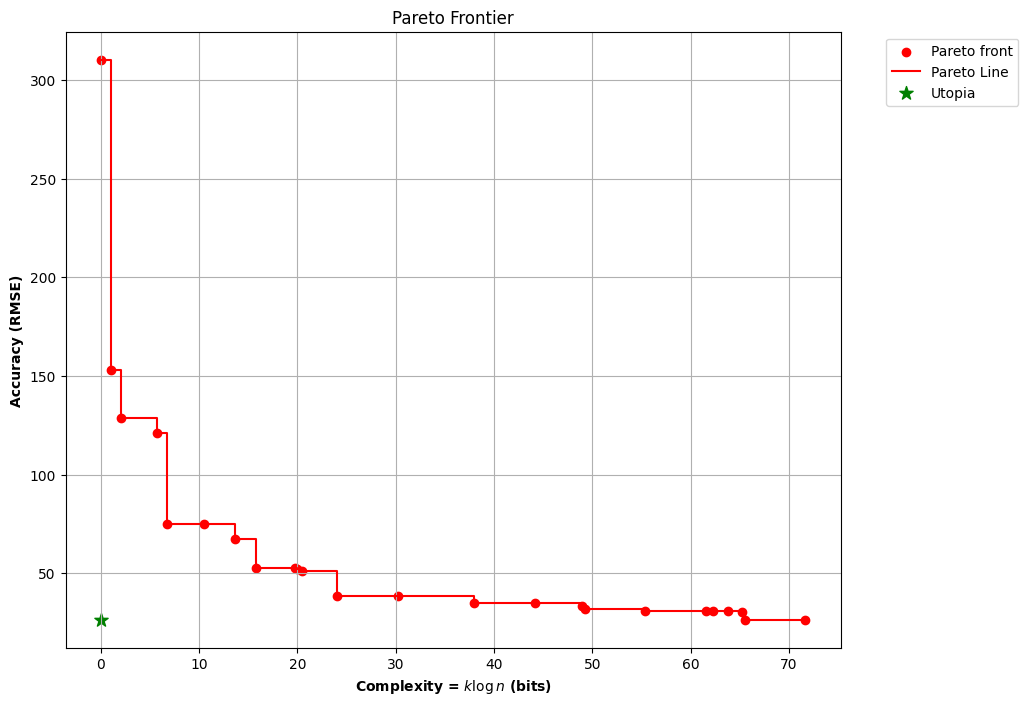

time to fit:  21.949012994766235 seconds


In [9]:
t0 = time.time()
myMod=SymanticModel(df=df,
                    operators = ['+','-','*','/'])
res=myMod.fit()
myMod.plot_pareto_front()
#m=res[0]['utopia']['expression']
#y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

In [12]:
myEq=res[0]['utopia']['expression']
print(myEq)

3.9072*TBP + 931498.6155*(SG/TBP) + -1888.7611*SG - 1825.4733


In [13]:
sym.simplify(myEq)

-1888.7611*SG + 931498.6155*SG/TBP + 3.9072*TBP - 1825.4733

In [18]:
def muth_Mw(sg,tbp):
  a00= -1888.7611
  a01= 931498.6155
  a02= 3.9072
  a03= -1825.4733
  mw=a00*sg+a01*sg/tbp+a02*tbp+a03
  return mw


In [19]:
y_muth=np.zeros(len(df))
for i in range(len(df)):
    y_muth[i]=muth_Mw(df.at[i,'SG'],df.at[i,'TBP'])

df['Fit_Mw']=y_muth
df.corr()


,MW,SG,TBP,Fit_Mw
MW,1.000000,0.334852,0.869591,0.970451
SG,0.334852,1.000000,0.625218,0.345058
TBP,0.869591,0.625218,1.000000,0.896075
Fit_Mw,0.970451,0.345058,0.896075,1.000000


### Results
Let's take a peek at how the predicted molecular mass looks compared to the actual:

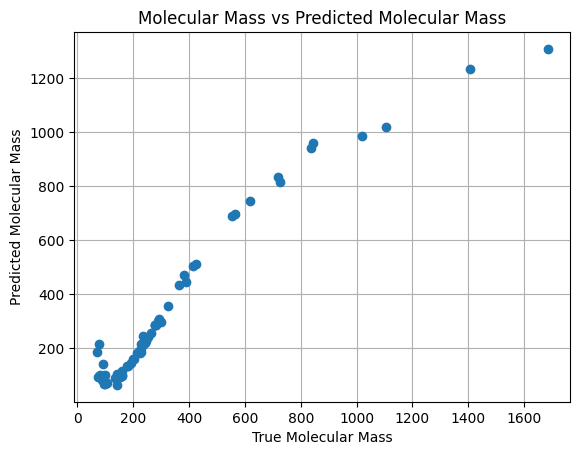

In [21]:
plt.plot(df['MW'],y_muth,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

As the correlation looks reasonable, let us take a look at the equation:

This looks dramatically different.  Lets us clean it up a bit:

In [23]:
# Import Hosseinifar Dataset

# Colab Version
#drive.mount('/content/drive')
dfh=pd.read_csv('/content/drive/MyDrive/hosseinifar_raw.csv')
# Positron Version
#dfh=pd.read_csv('./hosseinifar_raw.csv')
# RStudio Version
# dfh=pd.read_csv('./c694/goossens_raw.csv')

In [24]:
# Predict Hosseinifar
#yh=dfh['MW']
#xh=dfh[['SG','TBP']]
#y_hoss=myMod.predict(xh)
z_muth=np.zeros(len(dfh))
for i in range(len(dfh)):
    z_muth[i]=muth_Mw(dfh.at[i,'SG'],dfh.at[i,'TBP'])

dfh['Fit_Mw']=z_muth
dfh.corr()


,SG,TBP,MW,Fit_Mw
SG,1.000000,0.985561,0.954145,0.911386
TBP,0.985561,1.000000,0.990235,0.965965
MW,0.954145,0.990235,1.000000,0.992303
Fit_Mw,0.911386,0.965965,0.992303,1.000000
